In [78]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [79]:
df =pd.read_csv('Admission_Predict_Ver.csv')
df.head()
     

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [80]:

df.shape

(500, 9)

In [81]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [82]:
df.drop(columns = ['Serial No.'],inplace=True)

In [83]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [84]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [85]:
#df = pd.get_dummies(df,columns=['University Rating'],drop_first=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [86]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [87]:

y_train


249    0.77
433    0.71
19     0.62
322    0.72
332    0.75
       ... 
106    0.87
270    0.72
348    0.57
435    0.55
102    0.62
Name: Chance of Admit , Length: 400, dtype: float64

In [88]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
86,315,106,3,4.5,3.5,8.42,0
75,329,114,2,2.0,4.0,8.56,1
438,318,110,1,2.5,3.5,8.54,1


In [89]:
# Standardizing the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_test_scaled

array([[ 1.57660363,  1.42427137,  0.7754586 ,  0.63397891,  0.02173015,
         1.59721688,  0.89543386],
       [-0.24896144,  0.10930646,  0.7754586 ,  1.14116204,  0.56498381,
         0.76468267,  0.89543386],
       [-0.15768318, -0.38380538, -0.97205374, -1.39475361, -1.06477718,
        -1.54976243, -1.11677706],
       [-0.43151794,  0.27367707, -0.09829757, -0.38038735, -0.52152352,
         0.18190872, -1.11677706],
       [ 0.8463776 ,  0.76678891, -0.09829757,  0.12679578, -0.52152352,
         0.78133336,  0.89543386],
       [ 1.12021236,  0.6024183 ,  0.7754586 ,  1.14116204,  0.56498381,
         1.08104567,  0.89543386],
       [-2.43963951, -1.20565845, -1.8458099 , -1.90193674, -1.60803084,
        -1.69961859, -1.11677706],
       [-1.43557873, -0.21943477,  0.7754586 , -0.88757048, -0.52152352,
        -0.18440633, -1.11677706],
       [ 0.11615158,  0.27367707, -0.09829757,  0.12679578,  0.56498381,
         1.06439499,  0.89543386],
       [ 0.29870808,  0.7667

In [91]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [92]:

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer

    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer

    tf.keras.layers.Dense(1)  # Output layer for regression (no activation function on output as problem is regression so will us linear activation function)
])

C:\Users\hanfi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [94]:
history = model.fit(X_train_scaled,y_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.5596 - mae: 0.7274 - val_loss: 0.1564 - val_mae: 0.3728
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1286 - mae: 0.3243 - val_loss: 0.0440 - val_mae: 0.1681
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0522 - mae: 0.1838 - val_loss: 0.0610 - val_mae: 0.1879
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0476 - mae: 0.1720 - val_loss: 0.0349 - val_mae: 0.1381
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mae: 0.1448 - val_loss: 0.0263 - val_mae: 0.1188
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mae: 0.1069 - val_loss: 0.0244 - val_mae: 0.1164
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mae: 0.0980 - val_loss: 0.0226 - val_mae: 0.1084
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mae: 0.0873 - val_loss: 0.0206 - val_mae: 0.1016
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.01

In [95]:
model.layers[0].get_weights()

[array([[-0.2663198 , -0.1182769 ,  0.05023954,  0.29102698, -0.05005771,
          0.20914777,  0.20729415,  0.07004233,  0.15764478, -0.14877117,
          0.14798364,  0.11317281,  0.1557188 ,  0.19684356,  0.07061855,
         -0.0145051 ,  0.15440886, -0.17100878,  0.04024371, -0.098083  ,
         -0.07044752, -0.01202533, -0.22285558, -0.04765873, -0.29472187,
         -0.01534176,  0.16038246, -0.1931421 , -0.22290665, -0.03385337,
         -0.26887336,  0.09049638,  0.30363396, -0.14082067,  0.06692281,
         -0.08391654,  0.00217522,  0.17832448,  0.27432922,  0.23804283,
         -0.15496667,  0.2376389 , -0.02922061,  0.05085111,  0.08954787,
          0.02098054, -0.18603887, -0.14316234,  0.2836807 , -0.04808709,
          0.15333328, -0.17578273, -0.118138  ,  0.28361356,  0.03112355,
          0.22543229,  0.04499163, -0.03359038,  0.01234928, -0.17952377,
         -0.23207892,  0.2173854 ,  0.0907162 , -0.08337642],
        [ 0.12759507,  0.1814728 ,  0.06849422,  0

In [96]:
model.layers[1].get_weights()

[array([[ 0.19175991,  0.13592389, -0.14352949, ..., -0.22403486,
          0.16062534,  0.0149172 ],
        [-0.08216707, -0.23789169,  0.0870942 , ..., -0.20435607,
         -0.05834206,  0.18449159],
        [-0.29737863, -0.21189113,  0.02958944, ..., -0.14644106,
          0.0690776 , -0.16272923],
        ...,
        [-0.19370703, -0.2007135 ,  0.00693326, ..., -0.16292478,
         -0.02418281, -0.16281554],
        [ 0.15716086, -0.06062247,  0.21569544, ..., -0.01194789,
          0.09724714,  0.26192242],
        [ 0.11306494,  0.15481302,  0.02822762, ...,  0.16369003,
          0.10953145,  0.18357764]], dtype=float32),
 array([ 0.10218025, -0.00622211,  0.04719929,  0.02526433, -0.02213022,
         0.06838918, -0.02491084,  0.03280253, -0.0250069 , -0.02334554,
        -0.01707365,  0.02943194, -0.02678191, -0.02546785, -0.03106275,
         0.03851327, -0.01868908,  0.10535004,  0.10009298,  0.03984305,
         0.0212829 ,  0.02868678, -0.0235344 ,  0.03158758,  0.028

In [97]:
model.layers[2].get_weights()

[array([[ 2.4065575e-01],
        [ 1.4664263e-01],
        [ 1.5704226e-01],
        [ 4.1343119e-02],
        [-4.3228947e-06],
        [ 4.3791214e-01],
        [-2.1982600e-01],
        [ 3.6563486e-01],
        [-1.8529208e-01],
        [-1.4939028e-01],
        [-7.6275356e-03],
        [ 2.3743443e-01],
        [-1.8232249e-01],
        [-3.9393279e-01],
        [-1.4223874e-01],
        [ 1.8188076e-01],
        [-2.0673122e-01],
        [ 4.0153143e-01],
        [ 1.5443715e-01],
        [ 7.4354701e-02],
        [ 3.7279762e-02],
        [ 3.6817783e-01],
        [-2.5258979e-01],
        [ 4.0551597e-01],
        [ 1.5915561e-01],
        [-1.9329859e-01],
        [ 1.7019719e-01],
        [-2.0506762e-01],
        [-2.2793373e-01],
        [-1.1800367e-01],
        [-3.3310974e-01],
        [ 4.2008132e-01]], dtype=float32),
 array([0.02875568], dtype=float32)]

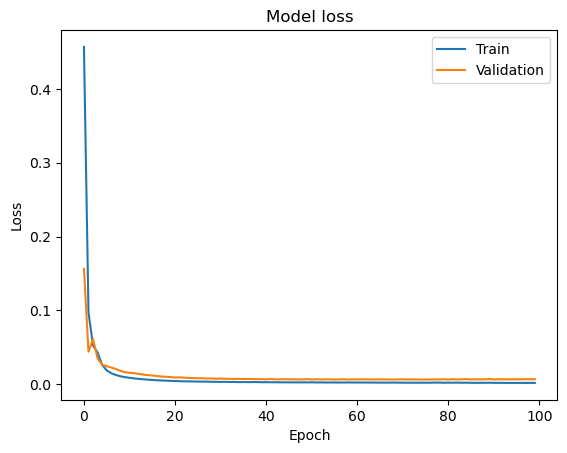

In [98]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# using early stopping criteria

Epoch 1/100


C:\Users\hanfi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6094.2681 - mae: 74.3211 - val_loss: 170.7193 - val_mae: 13.0563
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76.1246 - mae: 7.5927 - val_loss: 178.7702 - val_mae: 13.3564
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 159.0048 - mae: 12.4867 - val_loss: 21.6086 - val_mae: 4.6369
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3686 - mae: 2.6743 - val_loss: 13.0375 - val_mae: 3.5992
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.4807 - mae: 3.3340 - val_loss: 0.7554 - val_mae: 0.8306
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5175 - mae: 0.6130 - val_loss: 1.3282 - val_mae: 1.1223
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9303 - mae: 0.8810 - val_loss: 0.0782 - val_mae: 0.2283
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1437 - mae: 0.3148 - val_loss: 0.1190 - val_mae: 0.2856
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss:

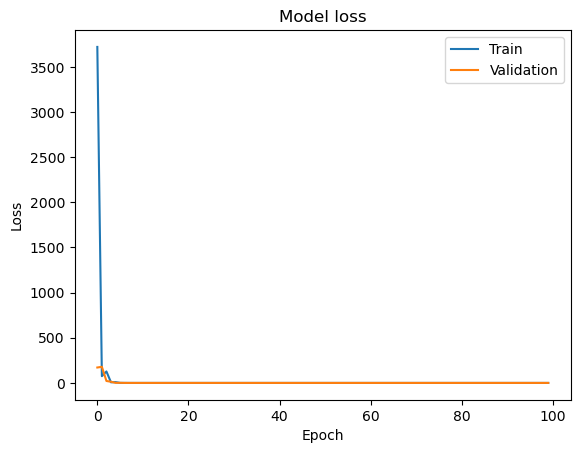

In [101]:
# Load tips dataset
prediction =pd.read_csv('Admission_Predict_Ver.csv')
prediction.head()
     
# Preprocessing
# Converting categorical variables to dummy variables
prediction.drop(columns = ['Serial No.'],inplace=True)


X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


# Standardizing the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer

    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer

    tf.keras.layers.Dense(1)  # Output layer for regression (no activation function on output as problem is regression so will us linear activation function)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()





